<a href="https://colab.research.google.com/github/Arindam2002/tensorflow_learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN & Computer Vision with TensorFlow

In [ ]:
!nvidia-smi

Sat Jul  9 14:51:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get the data

> Food101 dataset from Kaggle
(However, we're using a modified dataset to use only two classes, viz. pizza & steak... [This is how we modified it](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)).

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-09 14:51:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   185MB/s    in 0.6s    

2022-07-09 14:51:38 (185 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory & list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There ate {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There ate 2 directories and 0 images in 'pizza_steak'
There ate 2 directories and 0 images in 'pizza_steak/test'
There ate 0 directories and 250 images in 'pizza_steak/test/pizza'
There ate 0 directories and 250 images in 'pizza_steak/test/steak'
There ate 2 directories and 0 images in 'pizza_steak/train'
There ate 0 directories and 750 images in 'pizza_steak/train/pizza'
There ate 0 directories and 750 images in 'pizza_steak/train/steak'


In [ ]:
# Another way to find the number of images in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

> To visualize our images, first let's get the class names programmatically.

In [3]:
# Get class names programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Created a list of class names from the sub directories

class_names

array([], dtype=float64)

In [6]:
# Visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read the image and plot it
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

['1778167.jpg']
Image shape: (512, 512, 3)


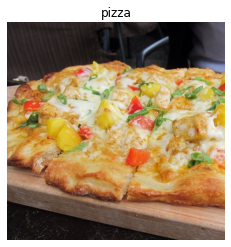

In [ ]:
# View a random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 39,  35,  34],
        [ 40,  36,  35],
        [ 39,  35,  34],
        ...,
        [ 95,  94, 112],
        [ 94,  93, 111],
        [ 93,  92, 110]],

       [[ 38,  34,  33],
        [ 39,  35,  34],
        [ 39,  35,  34],
        ...,
        [ 96,  95, 113],
        [ 95,  94, 112],
        [ 94,  93, 111]],

       [[ 37,  33,  32],
        [ 38,  34,  33],
        [ 38,  34,  33],
        ...,
        [ 97,  96, 114],
        [ 96,  95, 113],
        [ 96,  95, 113]],

       ...,

       [[ 19,  17,  20],
        [ 19,  17,  20],
        [ 19,  17,  20],
        ...,
        [107,  83,  71],
        [107,  83,  71],
        [108,  84,  72]],

       [[ 20,  18,  21],
        [ 20,  18,  21],
        [ 19,  17,  20],
        ...,
        [105,  81,  69],
        [106,  82,  70],
        [107,  83,  71]],

       [[ 22,  20,  23],
        [ 23,  21,  24],
        [ 22,  20,  23],
        ...,
        [104,  80,  6

In [ ]:
img.shape   # returns width, height, color channels

(512, 512, 3)

> Normalize the input data

In [ ]:
img / 255

array([[[0.15294118, 0.1372549 , 0.13333333],
        [0.15686275, 0.14117647, 0.1372549 ],
        [0.15294118, 0.1372549 , 0.13333333],
        ...,
        [0.37254902, 0.36862745, 0.43921569],
        [0.36862745, 0.36470588, 0.43529412],
        [0.36470588, 0.36078431, 0.43137255]],

       [[0.14901961, 0.13333333, 0.12941176],
        [0.15294118, 0.1372549 , 0.13333333],
        [0.15294118, 0.1372549 , 0.13333333],
        ...,
        [0.37647059, 0.37254902, 0.44313725],
        [0.37254902, 0.36862745, 0.43921569],
        [0.36862745, 0.36470588, 0.43529412]],

       [[0.14509804, 0.12941176, 0.1254902 ],
        [0.14901961, 0.13333333, 0.12941176],
        [0.14901961, 0.13333333, 0.12941176],
        ...,
        [0.38039216, 0.37647059, 0.44705882],
        [0.37647059, 0.37254902, 0.44313725],
        [0.37647059, 0.37254902, 0.44313725]],

       ...,

       [[0.0745098 , 0.06666667, 0.07843137],
        [0.0745098 , 0.06666667, 0.07843137],
        [0.0745098 , 0

## An end to end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# set seed
tf.random.set_seed(42)

# Preprocess data (Normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),  # Standard size to work with (contains enough info for us to train the model)
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),  # Standard size to work with (contains enough info for us to train the model)
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = Sequential()

model_1.add(Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
model_1.add(Conv2D(10, 3, activation="relu"))
model_1.add(MaxPool2D(pool_size=2, padding="valid"))

model_1.add(Conv2D(10, 3, activation="relu"))
model_1.add(Conv2D(10, 3, activation="relu"))
model_1.add(MaxPool2D(pool_size=2, padding="valid"))

model_1.add(Flatten())

model_1.add(Dense(1, activation="sigmoid"))

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 210ms/step - loss: 0.5498 - accuracy: 0.7013 - val_loss: 0.3742 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4088 - accuracy: 0.8233 - val_loss: 0.3526 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3884 - accuracy: 0.8293 - val_loss: 0.3258 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3690 - accuracy: 0.8387 - val_loss: 0.3881 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3394 - accuracy: 0.8633 - val_loss: 0.3160 - val_accuracy: 0.8600


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](http://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.52527&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TF playground model
model_2 = Sequential()
model_2.add(Flatten(input_shape=(224, 224, 3)))
model_2.add(Dense(units=4, activation="relu"))
model_2.add(Dense(units=4, activation="relu"))
model_2.add(Dense(units=1, activation="sigmoid"))

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 1.3161 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


> Despite having 20x more parameters than model_1, model_2 performs terribly... Let's try to improve it!

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TF playground model
model_3 = Sequential()

model_3.add(Flatten(input_shape=(224, 224, 3)))
model_3.add(Dense(units=512, activation="relu"))
model_3.add(Dense(units=512, activation="relu"))
model_3.add(Dense(units=512, activation="relu"))
model_3.add(Dense(units=1, activation="sigmoid"))

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 9s 191ms/step - loss: 387.9265 - accuracy: 0.5447 - val_loss: 0.8008 - val_accuracy: 0.5760
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.5909 - accuracy: 0.7287 - val_loss: 0.5044 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.5359 - accuracy: 0.7527 - val_loss: 0.5822 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5480 - accuracy: 0.7587 - val_loss: 0.4653 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4912 - accuracy: 0.7707 - val_loss: 0.4593 - val_accuracy: 0.7980


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               77070848  
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 77,596,673
Trainable params: 77,596,673
Non-trainable params: 0
_________________________________________________________________


## Binary classfication: Breaking it down...

a. Become one with the data (visualize, visualize, visualize)

b. Preprocess the data (prepared it for our model... the main step here was scaling/normalization)

c. Created a model (start with a baseline)

d. Fit the model

e. Evaluate the model

f. Improve the model

g. Repeat

### a. Becoming one with the data

['663014.jpg']
Image shape: (512, 512, 3)
['1968947.jpg']
Image shape: (512, 512, 3)


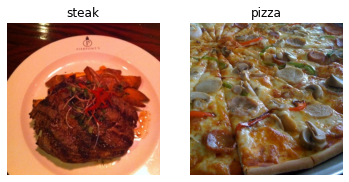

In [ ]:
# Visualize data
plt.figure()

plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1, 2, 2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

### b. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

> Turn our data into **batches**

In [ ]:
# Create train and test data generators & rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
# Load in our image data from driectories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,     # Target directory of images
                                               target_size=(224, 224),  # Target size of images (height, width)
                                               class_mode="binary",     # Type of data we're working with
                                               batch_size=32)           # Size of mini batches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a samole of training data batch
images, labels = train_data.next()      # Get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
#  Number of batches
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# First batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### c. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
# Create the model (Our Baseline - A 3 layer CNN)
model_4 = Sequential()

model_4.add(Conv2D(filters=10,                      # filter is the number of sliding windows going across an input (higher = more complex model)
                   kernel_size=3,                   # the size of the sliding window going across an input
                   strides=1,                       # the size of the step the sliding window takes across an input 
                   padding="valid",                 # If "same", output shape == input shape, if "valid", output shape gets compressed
                   activation="relu",
                   input_shape=(224, 224, 3)))      # Input layer (specify input shape)

model_4.add(Conv2D(10, 3, activation="relu"))
model_4.add(Conv2D(10, 3, activation="relu"))
model_4.add(Flatten())
model_4.add(Dense(units=1, activation="sigmoid"))   # Output layer (Working with binary classification so only 1 output neuron)


> Padding = "valid" helps to capture the data near the border

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### d. Fit the model

In [ ]:
# Check lengths of training & test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 1.5234 - accuracy: 0.6560 - val_loss: 0.4597 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4544 - accuracy: 0.7947 - val_loss: 0.4457 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3810 - accuracy: 0.8413 - val_loss: 0.4146 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.2605 - accuracy: 0.9073 - val_loss: 0.3748 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.1248 - accuracy: 0.9653 - val_loss: 0.4899 - val_accuracy: 0.7920


### e. Evaluating the model

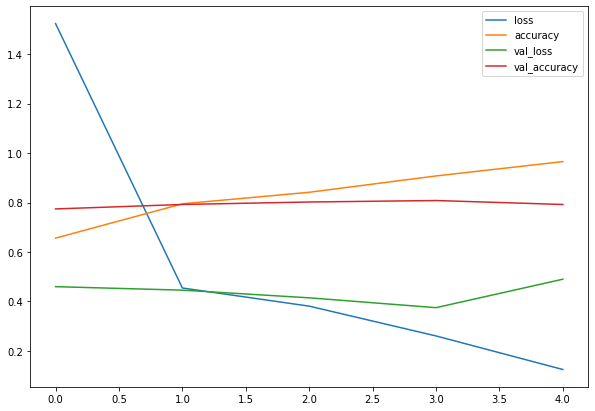

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [13]:
# Plot the validation & training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training & validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))    # how many epochs did we run for

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

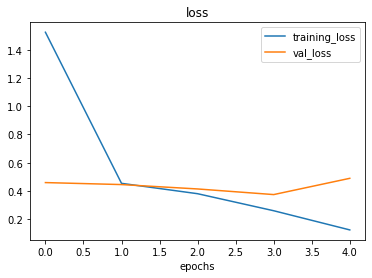

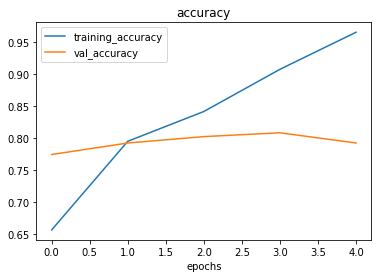

In [ ]:
# Checkout the loss and accuracy of model 4
plot_loss_curves(history_4)

> 🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates). When there are large differences... your model may be **overfitting**. 

### f. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [ ]:
#  Create the model (this is gonna be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(units=1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 255ms/step - loss: 0.6003 - accuracy: 0.6807 - val_loss: 0.4506 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4746 - accuracy: 0.7860 - val_loss: 0.4183 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4251 - accuracy: 0.8120 - val_loss: 0.4296 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4026 - accuracy: 0.8260 - val_loss: 0.3645 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3771 - accuracy: 0.8420 - val_loss: 0.3540 - val_accuracy: 0.8680


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

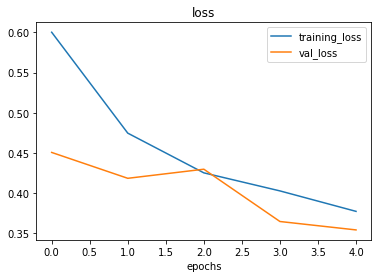

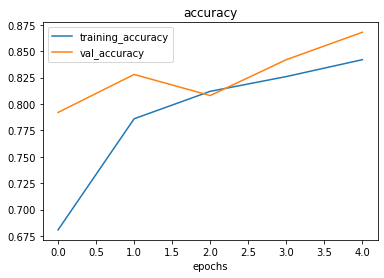

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Data Augmentation

Altering our training data to have more diversity... Therefore allowing our model to learn more generalizable (🤞) patterns.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)   # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)   # for demonstration purposes only

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary")   # for demonstration purposes only


Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Get some sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 4


(-0.5, 223.5, 223.5, -0.5)

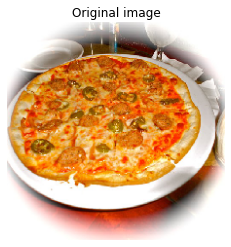

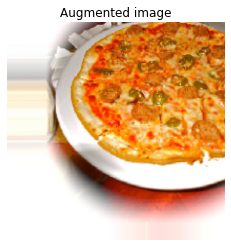

In [ ]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 32)   # Our batch size is 32

print(f"Showing image number: {random_number}")

plt.figure()
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

> Let's fit a new model on augmented data!

In [ ]:
#  Create the model (this is gonna be our new baseline)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(units=1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 652ms/step - loss: 0.7105 - accuracy: 0.4513 - val_loss: 0.6843 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 23s 485ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6810 - val_accuracy: 0.5080
Epoch 3/5
47/47 [==============================] - 24s 516ms/step - loss: 0.6838 - accuracy: 0.5167 - val_loss: 0.6664 - val_accuracy: 0.5220
Epoch 4/5
47/47 [==============================] - 24s 514ms/step - loss: 0.6904 - accuracy: 0.5113 - val_loss: 0.6688 - val_accuracy: 0.5600
Epoch 5/5
47/47 [==============================] - 24s 512ms/step - loss: 0.6812 - accuracy: 0.5253 - val_loss: 0.6786 - val_accuracy: 0.6660


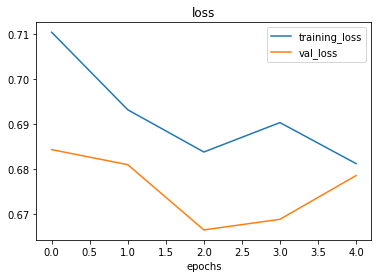

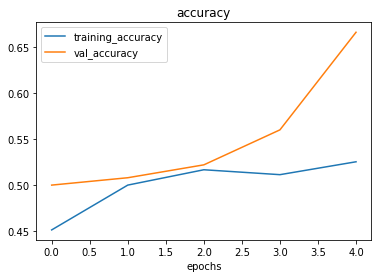

In [ ]:
plot_loss_curves(history_6)

> Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
#  Create the model (this is gonna be our new baseline)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(units=1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,     # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 480ms/step - loss: 0.6318 - accuracy: 0.6307 - val_loss: 0.4846 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 25s 526ms/step - loss: 0.5630 - accuracy: 0.7213 - val_loss: 0.4796 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 22s 479ms/step - loss: 0.5296 - accuracy: 0.7453 - val_loss: 0.4033 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 23s 497ms/step - loss: 0.5065 - accuracy: 0.7700 - val_loss: 0.4016 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 23s 483ms/step - loss: 0.4901 - accuracy: 0.7727 - val_loss: 0.3591 - val_accuracy: 0.8460


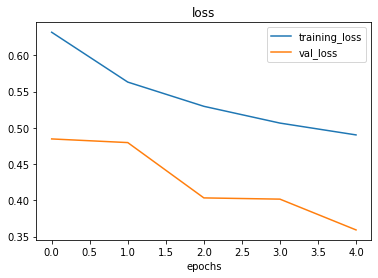

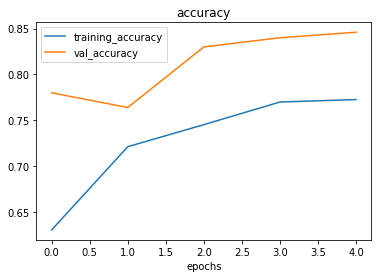

In [ ]:
plot_loss_curves(history_7)

### g. Repeat

Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate 
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

## Making a prediction with our trained model on our own custom data

(-0.5, 3999.5, 2999.5, -0.5)

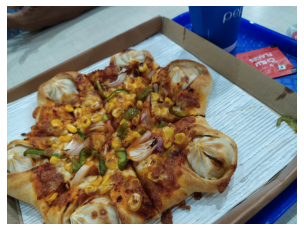

In [ ]:
# View our exampple image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

pizza = mpimg.imread("/content/IMG_20220606_213010.jpg")    # Image can be found in drive folder of this colab notebbok
plt.imshow(pizza)
plt.axis(False)

In [ ]:
pizza.shape

(3000, 4000, 3)

In [ ]:
pizza

array([[[ 63,  61,  83],
        [ 65,  63,  84],
        [ 68,  67,  83],
        ...,
        [180, 196, 195],
        [176, 191, 188],
        [166, 181, 178]],

       [[ 72,  74,  97],
        [ 72,  74,  95],
        [ 72,  73,  93],
        ...,
        [180, 196, 195],
        [176, 191, 188],
        [168, 183, 180]],

       [[ 82,  89, 117],
        [ 80,  87, 113],
        [ 73,  79, 101],
        ...,
        [178, 194, 193],
        [178, 192, 192],
        [172, 186, 186]],

       ...,

       [[137, 139, 128],
        [136, 138, 127],
        [133, 135, 124],
        ...,
        [159, 190, 192],
        [167, 197, 197],
        [164, 193, 191]],

       [[104, 106,  95],
        [110, 112, 101],
        [120, 122, 111],
        ...,
        [152, 182, 182],
        [157, 186, 184],
        [161, 187, 186]],

       [[ 95,  96,  88],
        [106, 107,  99],
        [122, 123, 115],
        ...,
        [154, 182, 183],
        [162, 188, 187],
        [170, 194, 194]]

> **Note:** When you a train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [23]:
# Create a function to import an image & resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename=filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=(img_shape, img_shape))

  # Rescale the image (Normalization)
  img = img / 255

  return img

In [ ]:
# Load in and preprocess our custom image
pizza = load_and_prep_image("IMG_20220606_213010.jpg")
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.20381154, 0.25855342, 0.2814526 ],
        [0.35639253, 0.25713286, 0.2052521 ],
        [0.31556624, 0.22144857, 0.17438975],
        ...,
        [0.60271096, 0.73758495, 0.74073625],
        [0.6492903 , 0.7669374 , 0.7747805 ],
        [0.63876486, 0.7711988 , 0.76253414]],

       [[0.14950976, 0.3060924 , 0.387535  ],
        [0.25897357, 0.22764106, 0.16526613],
        [0.31771696, 0.25035   , 0.19222675],
        ...,
        [0.61216533, 0.7415771 , 0.76118493],
        [0.6441081 , 0.77744144, 0.781363  ],
        [0.6016803 , 0.758543  , 0.75462145]],

       [[0.10796317, 0.30383155, 0.40964386],
        [0.12012803, 0.28884554, 0.40369147],
        [0.21641639, 0.30289102, 0.28910547],
        ...,
        [0.61672646, 0.7500598 , 0.75399137],
        [0.5747794 , 0.7081127 , 0.7120343 ],
        [0.61960787, 0.76862746, 0.77254903]],

       ...,

       [[0.48321682, 0.49105996, 0.44007957],
        [0.52

In [ ]:
pred = model_7.predict(tf.expand_dims(pizza, axis=0))
pred

array([[0.40639204]], dtype=float32)

> The above data is prediction probability... Let's visualize the image and the model's prediction.

In [ ]:
# Class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability & indexing it on class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

> Lesgooooooooooo

In [15]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

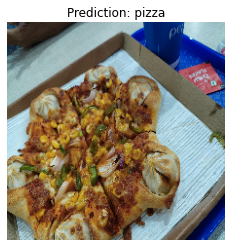

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "IMG_20220606_213010.jpg")

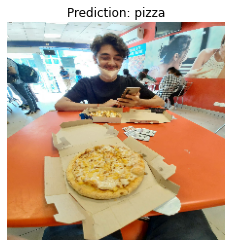

In [ ]:
pred_and_plot(model_7, "20211010_154150.jpg")

## Multi-class Image classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust differet hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [9]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-10 09:39:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.128, 74.125.141.128, 74.125.139.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   179MB/s    in 2.8s    

2022-07-10 09:39:27 (179 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [10]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [11]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [12]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2303238.jpg']
Image shape: (512, 512, 3)


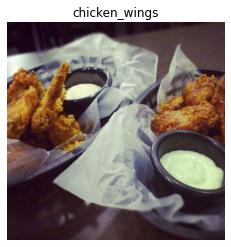

In [7]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for the model)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Load datain from directories & turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam

In [20]:
# Create our model
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(units=10, activation="softmax")
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

### 4. Fit the model

In [11]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 190ms/step - loss: 2.2328 - accuracy: 0.1599 - val_loss: 2.1070 - val_accuracy: 0.2252
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 1.9424 - accuracy: 0.3237 - val_loss: 1.9842 - val_accuracy: 0.2936
Epoch 3/5
235/235 [==============================] - 44s 188ms/step - loss: 1.5751 - accuracy: 0.4609 - val_loss: 2.0706 - val_accuracy: 0.2980
Epoch 4/5
235/235 [==============================] - 45s 190ms/step - loss: 1.0900 - accuracy: 0.6361 - val_loss: 2.5935 - val_accuracy: 0.2668
Epoch 5/5
235/235 [==============================] - 47s 199ms/step - loss: 0.5373 - accuracy: 0.8269 - val_loss: 3.3319 - val_accuracy: 0.2556


### 5. Evaluate the model

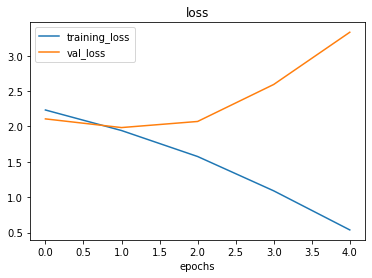

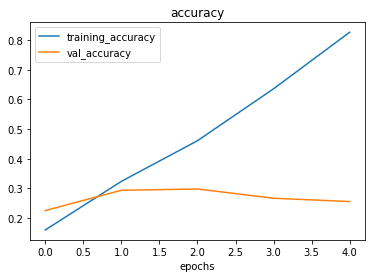

In [14]:
# Loss curves
plot_loss_curves(history_8)

> Our model is overfitting the training set

### 6. Adjust the hyperparameters to beat the baseline (reduce overfitting)

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentaiton manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset 

In [15]:
# First, let's try to simplify our model
# Let's try to remove 2 convolusional layers...
# Create our model
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(units=10, activation="softmax")
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [16]:
# Fit the model with 2 conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 188ms/step - loss: 2.1283 - accuracy: 0.2404 - val_loss: 1.9809 - val_accuracy: 0.2720
Epoch 2/5
235/235 [==============================] - 45s 193ms/step - loss: 1.8008 - accuracy: 0.3868 - val_loss: 1.8807 - val_accuracy: 0.3448
Epoch 3/5
235/235 [==============================] - 50s 211ms/step - loss: 1.4197 - accuracy: 0.5419 - val_loss: 2.0323 - val_accuracy: 0.3200
Epoch 4/5
235/235 [==============================] - 42s 181ms/step - loss: 0.9145 - accuracy: 0.7159 - val_loss: 2.1784 - val_accuracy: 0.3096
Epoch 5/5
235/235 [==============================] - 46s 195ms/step - loss: 0.4791 - accuracy: 0.8671 - val_loss: 2.6212 - val_accuracy: 0.2860


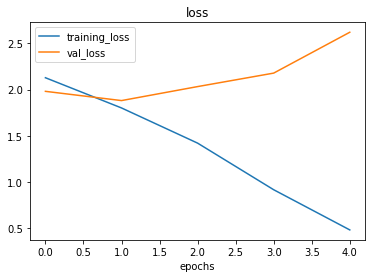

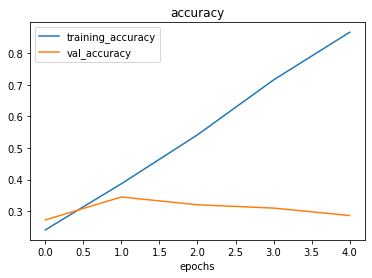

In [17]:
# Loss curves
plot_loss_curves(history_9)

In [18]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [19]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

> Simplifying the model clearly didn't work... Let's try data augmentation!

### Trying to reduce overfitting with data augmentation

In [21]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             shear_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [21]:
# Create model for augmented data to fit on
model_10 = tf.keras.models.clone_model(model_8)

# Compile the model
model_10.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [26]:
# Fit the model on augmented data
history_10 = model_10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 121s 513ms/step - loss: 2.2095 - accuracy: 0.1887 - val_loss: 2.0628 - val_accuracy: 0.2336
Epoch 2/5
235/235 [==============================] - 109s 464ms/step - loss: 2.0970 - accuracy: 0.2444 - val_loss: 2.0009 - val_accuracy: 0.2752
Epoch 3/5
235/235 [==============================] - 109s 465ms/step - loss: 2.0243 - accuracy: 0.2783 - val_loss: 1.9759 - val_accuracy: 0.3024
Epoch 4/5
235/235 [==============================] - 110s 468ms/step - loss: 1.9864 - accuracy: 0.2996 - val_loss: 1.8434 - val_accuracy: 0.3556
Epoch 5/5
235/235 [==============================] - 109s 465ms/step - loss: 1.9380 - accuracy: 0.3219 - val_loss: 1.8800 - val_accuracy: 0.3412


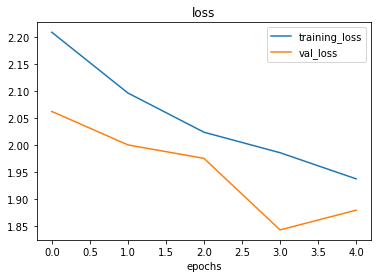

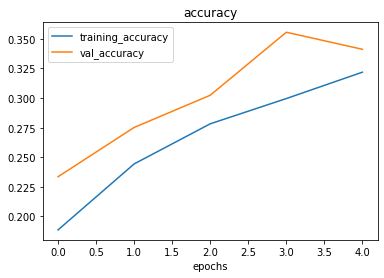

In [27]:
# Plot the loss curves
plot_loss_curves(history_10)

> This model is much better!

### 7. Repeat

By running lots of experiemtns, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

In [1]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-07-10 09:37:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-07-10 09:37:23 (41.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-07-10 09:37:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [25]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [27]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

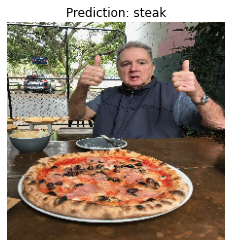

In [31]:
# Make a prediction using model_10
import matplotlib.pyplot as plt

pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

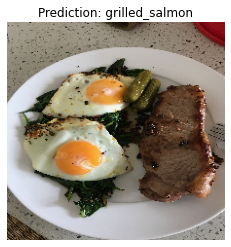

In [32]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

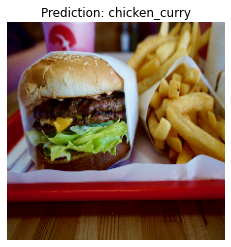

In [33]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

## Saving & loading our model

In [35]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [38]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 62s 785ms/step - loss: 2.3046 - accuracy: 0.1048


[2.3046066761016846, 0.10480000078678131]

In [39]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 53s 663ms/step - loss: 2.3046 - accuracy: 0.1048


[2.304607391357422, 0.10480000078678131]